In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [9]:
X = df_encoded.drop("price", axis=1)
y = df_encoded["price"]
X[:10],y[:10]

(    area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
 0   7420         4          2        3        2          True          False   
 1   8960         4          4        4        3          True          False   
 2   9960         3          2        2        2          True          False   
 3   7500         4          2        2        3          True          False   
 4   7420         4          1        2        2          True           True   
 5   7500         3          3        1        2          True          False   
 6   8580         4          3        4        2          True          False   
 7  16200         5          3        2        0          True          False   
 8   8100         4          1        2        2          True           True   
 9   5750         3          2        4        1          True           True   
 
    basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
 0         False               

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = model.predict(X_test)

In [19]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 970043.403920164
Mean Squared Error (MSE): 1754318687330.6643
R² Score: 0.6529242642153184


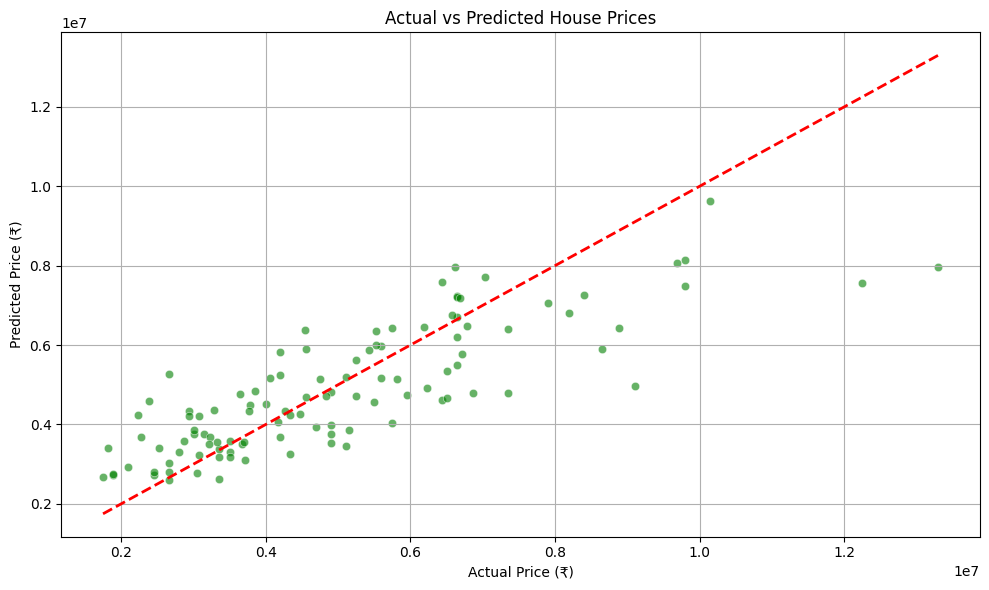

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Price (₹)")
plt.ylabel("Predicted Price (₹)")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()
